# Transition Points (Descriptive Charts)

To describe the transition points for different experimental conditions


## Requirements


In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(ggpubr)
    library(rstatix)
    library(dplyr)
    library(lme4)
    library(AICcmodavg)
    library(MuMIn)
    library(emmeans)
    library(patchwork)
}))

options(warn = -1) # turn-off warnings

## Data preparation

In [1]:
library(readxl)
setwd("C:/DataForR")
getwd()
data = read_excel("ProcessedData.xlsx", sheet = "BasicVars")
data

[1] "C:/DataForR"

subject No.,Axis Orientation,orientation No.,Rotation Condition,rotation No.,alpha1: descending transition point [SN],alpha2: ascending transition point [SN],PSE: point of subjective equality [SN],Hysteresis [SN],alpha1: descending transition point [AR],alpha2: ascending transition point [AR],PSE: point of subjective equality [AR],Hysteresis [AR]
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,without rotation,0,5.75,6.25,6.000,0.50,0.9181849,0.9575784,0.9378816,0.039393500
1,Orthogonal,0,with 90° rotation,1,8.50,9.00,8.750,0.50,1.1252976,1.1525000,1.1388988,0.027202375
1,Oblique,1,without rotation,0,7.25,7.25,7.250,0.00,1.0144047,1.0155953,1.0150000,0.001190500
1,Oblique,1,with 90° rotation,1,6.50,6.50,6.500,0.00,0.9761905,0.9761905,0.9761905,0.000000000
2,Orthogonal,0,without rotation,0,4.00,4.00,4.000,0.00,0.8057745,0.7996171,0.8026958,-0.006157375
2,Orthogonal,0,with 90° rotation,1,9.75,10.25,10.000,0.50,1.2125000,1.2875000,1.2500000,0.075000000
2,Oblique,1,without rotation,0,7.75,7.75,7.750,0.00,1.0400000,1.0427976,1.0413988,0.002797625
2,Oblique,1,with 90° rotation,1,6.25,6.00,6.125,-0.25,0.9627976,0.9494048,0.9561012,-0.013392875
3,Orthogonal,0,without rotation,0,6.50,6.25,6.375,-0.25,0.9750000,0.9627976,0.9688988,-0.012202375


In [3]:
# create a dataframe based on the required columns of data:
subject = data[,"subject No."]
AxisOrientation = data[,"Axis Orientation"]
orientation = data[,"orientation No."]
RotationCondition = data[,"Rotation Condition"]
rotation = data[,"rotation No."]

Descending_SN = data[,"alpha1: descending transition point [SN]"]
Ascending_SN  = data[,"alpha2: ascending transition point [SN]"]
Descending_AR = data[,"alpha1: descending transition point [AR]"]
Ascending_AR  = data[,"alpha2: ascending transition point [AR]"]

mydata1 = data.frame(subject,AxisOrientation,orientation,RotationCondition,rotation,
                     Ascending_SN,Descending_SN,Ascending_AR,Descending_AR)
colnames(mydata1) = c("subject","AxisOrientation","orientation","RotationCondition","rotation",
                      "Ascending_SN","Descending_SN","Ascending_AR","Descending_AR")

# Convert into factor variables
mydata1 = mydata1 %>%
  convert_as_factor(subject,AxisOrientation,RotationCondition)

# set the levels:
mydata1$AxisOrientation = factor(mydata1$AxisOrientation, levels = c("Orthogonal", "Oblique"))
mydata1$RotationCondition = factor(mydata1$RotationCondition, levels = c("without rotation", "with 90° rotation"))

mydata2 = mydata1

In [4]:
# convert data to the long format:
mydata1 = mydata1 %>%
    gather(key = order_SN, value = TransitionPoint_SN, Ascending_SN, Descending_SN)

mydata2 = mydata2 %>%
    gather(key = order_AR, value = TransitionPoint_AR, Ascending_AR, Descending_AR)

# combine data frames:
mydata = mydata1
mydata$TransitionPoint_AR = mydata2$TransitionPoint_AR

# clean the dataframe:
mydata$DisplayOrder = mydata$order_SN
mydata$order_SN = NULL
mydata$Ascending_AR = NULL
mydata$Descending_AR = NULL

mydata$DisplayOrder[mydata$DisplayOrder=="Ascending_SN"] = "Ascending"
mydata$DisplayOrder[mydata$DisplayOrder=="Descending_SN"] = "Descending"

# convert into factor and set the levels:
mydata$DisplayOrder = factor(mydata$DisplayOrder, levels = c("Ascending", "Descending"))

mydata

# write.table(mydata, "clipboard", sep="\t", row.names=FALSE)

subject,AxisOrientation,orientation,RotationCondition,rotation,TransitionPoint_SN,TransitionPoint_AR,DisplayOrder
<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,Orthogonal,0,without rotation,0,6.25,0.9575784,Ascending
1,Orthogonal,0,with 90° rotation,1,9.00,1.1525000,Ascending
1,Oblique,1,without rotation,0,7.25,1.0155953,Ascending
1,Oblique,1,with 90° rotation,1,6.50,0.9761905,Ascending
2,Orthogonal,0,without rotation,0,4.00,0.7996171,Ascending
2,Orthogonal,0,with 90° rotation,1,10.25,1.2875000,Ascending
2,Oblique,1,without rotation,0,7.75,1.0427976,Ascending
2,Oblique,1,with 90° rotation,1,6.00,0.9494048,Ascending
3,Orthogonal,0,without rotation,0,6.25,0.9627976,Ascending


## Visualization

### Transition Points in terms of SN (Stimulus Number)

In [5]:
# calculate mean, standard deviation and standard error:
SN.summary = mydata %>%
  group_by(AxisOrientation,RotationCondition,DisplayOrder) %>%
  summarise(
    mean = mean(TransitionPoint_SN),
    sd = sd(TransitionPoint_SN),
    se = sd(TransitionPoint_SN)/sqrt(34)
  )
SN.summary

`summarise()` has grouped output by 'AxisOrientation', 'RotationCondition'. You
can override using the `.groups` argument.


AxisOrientation,RotationCondition,DisplayOrder,mean,sd,se
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,without rotation,Ascending,5.875000,1.546318,0.2651913
Orthogonal,without rotation,Descending,5.213235,1.945403,0.3336338
Orthogonal,with 90° rotation,Ascending,9.125000,1.824964,0.3129787
Orthogonal,with 90° rotation,Descending,8.654412,1.576358,0.2703431
Oblique,without rotation,Ascending,7.536765,1.536343,0.2634807
Oblique,without rotation,Descending,6.654412,1.607292,0.2756484
Oblique,with 90° rotation,Ascending,7.573529,1.446691,0.2481054
Oblique,with 90° rotation,Descending,7.125000,1.388876,0.2381903


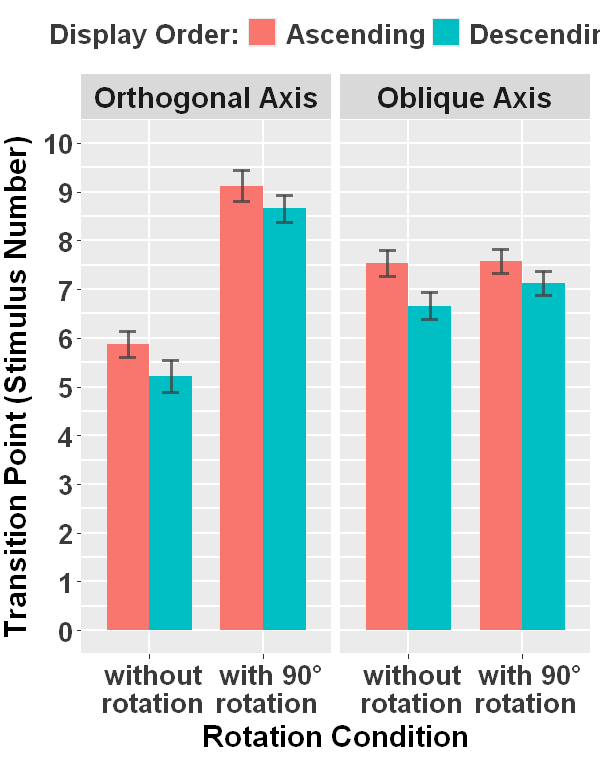

In [18]:
options(repr.plot.height=6.35, repr.plot.width=5)

ggplot(data = SN.summary, aes(x = RotationCondition, y = mean, fill = DisplayOrder, width=0.75)) +
    geom_bar(stat = "identity", position = position_dodge()) + 
    geom_errorbar(aes(x = RotationCondition, ymin = mean-se, ymax = mean+se), 
                  position = position_dodge(0.75), width=0.3, colour="Gray25", alpha=0.75, size=1) + 
    xlab("Rotation Condition") + ylab("Transition Point (Stimulus Number)") +
    labs(fill = "Display Order: ") + 
    coord_cartesian(ylim = c(0,10)) +
    scale_y_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10)) +
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust=2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) +
    scale_x_discrete(labels = c("without rotation" = "  without \n rotation", 
                                "with 90° rotation" = "   with 90° \n rotation")) +
    theme(legend.position='top') + 

    facet_grid(. ~ AxisOrientation, scales = "free_x",
                          labeller = as_labeller(c(`Orthogonal`="Orthogonal Axis", `Oblique`="Oblique Axis"))) + 
    theme(strip.text.x = element_text(size = 17.5, face = "bold"))
    
# save plot:
ggsave("plot_TransitionPoint.jpg", dpi = 300, height = 6.35, width = 5)

### Transition Points in terms of AR (Aspect Ratio)

In [7]:
# calculate mean, standard deviation and standard error:
AR.summary = mydata %>%
  group_by(AxisOrientation,RotationCondition,DisplayOrder) %>%
  summarise(
    mean = mean(TransitionPoint_AR),
    sd = sd(TransitionPoint_AR),
    se = sd(TransitionPoint_AR)/sqrt(34)
  )
AR.summary

`summarise()` has grouped output by 'AxisOrientation', 'RotationCondition'. You
can override using the `.groups` argument.


AxisOrientation,RotationCondition,DisplayOrder,mean,sd,se
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
Orthogonal,without rotation,Ascending,0.9286976,0.1195056,0.02049504
Orthogonal,without rotation,Descending,0.8897760,0.1881941,0.03227502
Orthogonal,with 90° rotation,Ascending,1.2262041,0.1999155,0.03428522
Orthogonal,with 90° rotation,Descending,1.1631365,0.1720592,0.02950790
Oblique,without rotation,Ascending,1.0617538,0.1834654,0.03146405
Oblique,without rotation,Descending,0.9875245,0.1248581,0.02141298
Oblique,with 90° rotation,Ascending,1.0544058,0.1192780,0.02045600
Oblique,with 90° rotation,Descending,1.0223157,0.1075369,0.01844243


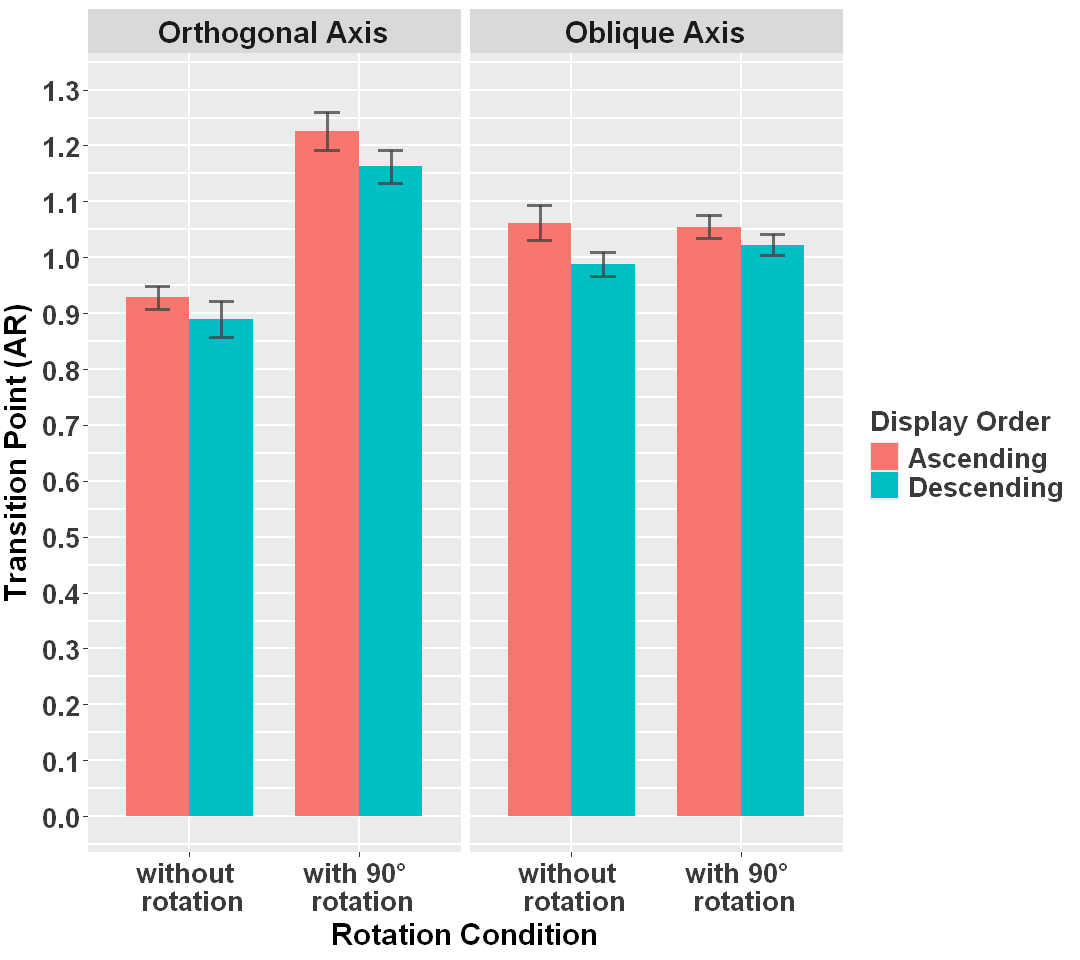

In [8]:
options(repr.plot.height=8, repr.plot.width=9)

ggplot(data = AR.summary, aes(x = RotationCondition, y = mean, fill = DisplayOrder, width=0.75)) +
    geom_bar(stat = "identity", position = position_dodge()) + 
    geom_errorbar(aes(x = RotationCondition, ymin = mean-se, ymax = mean+se), 
                  position = position_dodge(0.75), width=0.3, colour="Gray25", alpha=0.75, size=1) + 
    xlab("Rotation Condition") + ylab("Transition Point (AR)") +
    labs(fill = "Display Order") + 
    coord_cartesian(ylim = c(0,1.3)) +
    scale_y_continuous(breaks=c(0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3)) +
    theme(axis.title.x = element_text(size = 18, face="bold"),
          axis.title.y = element_text(size = 18, face="bold", vjust=2),
          axis.text.x  = element_text(size = 16, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) +
    scale_x_discrete(labels = c("without rotation" = "without \n rotation", 
                                "with 90° rotation" = "with 90° \n rotation")) +

    facet_grid(. ~ AxisOrientation, scales = "free_x",
                          labeller = as_labeller(c(`Orthogonal`="Orthogonal Axis", `Oblique`="Oblique Axis"))) + 
    theme(strip.text.x = element_text(size = 18, face = "bold"))
    
# save plot:
# ggsave("plot_PSE_AR_A.jpg", dpi = 300, height = 8, width = 9)